In [7]:
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("train.csv", parse_dates=['datetime'])
df_test = pd.read_csv("test.csv", parse_dates=['datetime'])

def EDA(df=df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['date'] = df['datetime'].dt.dayofweek
    df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
    df['date'] = df['datetime'].dt.strftime('%Y%m%d')
    
    # new_col for continuous variables
    df['hour_dow'] = df['hour'].astype('str') + '_' +df['dayofweek'].astype('str')
    df['work_hour'] = df['workingday'].astype('str') + '_' +df['hour'].astype('str')
    
    # fill windspeed==0
    cond1 = df['windspeed'] == 0
    WinZeroDate = df[cond1]['date'].unique()
    i = 0
    while i < len(WinZeroDate):
        cond2 = df['date'] == WinZeroDate[i]
        mean = df[cond2]['windspeed'].mean()
        df.loc[cond1&cond2, 'windspeed'] = mean
        i += 1
    
    # fill humidity == 0
    cond1 = df['humidity'] == 0
    df.loc[cond1, 'humidity'] = 98.75
    
    return df

def to_cat(col_list=['season', 'weather'], df=df):
    for col in col_list: 
        df[col] = df[col].astype('category')

df = EDA(df)
df_test = EDA(df_test)

### 도입
- 선택 이유
    - count = casual + registered
    - GLM
    - 상호작용항 구하기
    
### I. Model

### II. 데이터 탐색
### 1. target
1) casual

2) registered

### 2. independent values
1) Plotting

2) EDA
- windspeed
- humidity

### 3. Y vs X
1) Plotting

2) building model



---

# Model
- model1: target = count
- model2: target = registered & casual

In [98]:
# 답안작성
# sub = pd.read_csv("sampleSubmission.csv")
# a = np.exp(resc.predict(df_test)) - 1
# b = np.exp(resr.predict(df_test)) - 1
# c = np.exp(res.predict(df_test)) - 1

# sub['count'] = a + b
# sub.fillna(0, inplace=True)
# sub.loc[sub['count'] < 0, 'count'] = 0
# sub.to_csv("submission1.csv", index=False)

# sub['count'] = c
# sub.fillna(0, inplace=True)
# sub.loc[sub['count'] < 0, 'count'] = 0
# sub.to_csv("submission1.csv", index=False)
# sub = pd.read_csv("sampleSubmission.csv")

In [8]:
f = "np.log(count+1) ~ humidity/C(work_hour) + temp/C(work_hour) + windspeed/C(work_hour)-1"
mod = sm.OLS.from_formula(f, data=df)
res = mod.fit()

In [10]:
fc = "np.log(casual+1) ~ humidity/C(hour_dow) + temp/C(work_hour) + windspeed/C(work_hour) -1"
fr = "np.log(registered+1) ~ humidity/C(work_hour) + temp/C(work_hour) + windspeed/C(work_hour)-1"
modc = sm.OLS.from_formula(fc, data=df)
modr = sm.OLS.from_formula(fr, data=df)
resc = modc.fit()
resr = modr.fit()

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(count + 1)   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1885.
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:33:52   Log-Likelihood:                -14745.
No. Observations:               10886   AIC:                         2.978e+04
Df Residuals:                   10742   BIC:                         3.083e+04
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
humidity                           0.0307      0.003      9.705      0.000       0.024       0.037
humidity:C(work_hour)[T.0_1]       0.0002      0.004      0.050      0.960      -0.009       0.009
humidity:C(work_hour)[T.0_10]      0.0058      0.004      1.331      0.183      -0.003       0.014
humidity:C(work_hour)[T.0_11]      0.0068      0.004      1.527      0.127      -0.002       0.015
humidity:C(work_hour)[T.0_12]      0.0084      0.004      1.892      0.059      -0.000       0.017
humidity:C(work_hour)[T.0_13]      0.0054      0.005      1.192      0.233      -0.003       0.014
humidity:C(work_hour)[T.0_14]      0.0037      0.005      0.806      0.420      -0.005       0.013
humidity:C(work_hour)[T.0_15]      0.0018      0.004      0.403      0.687      -0.007       0.011
humidity:C(work_hour)[T.0_16]     -0.0028      0.004     -0.628      0.530      -0.012       0.006
humidity:C(work_hour)[T.0_17]     -0.0018      0.004     -0.408      0.683      -0.010       0.007
humidity:C(work_hour)[T.0_18]     -0.0022      0.004     -0.496      0.620      -0.011       0.006
humidity:C(work_hour)[T.0_19]     -0.0052      0.004     -1.178      0.239      -0.014       0.003
humidity:C(work_hour)[T.0_2]      -0.0015      0.004     -0.331      0.740      -0.010       0.007
humidity:C(work_hour)[T.0_20]     -0.0054      0.004     -1.232      0.218      -0.014       0.003
humidity:C(work_hour)[T.0_21]     -0.0062      0.004     -1.390      0.165      -0.015       0.003
humidity:C(work_hour)[T.0_22]     -0.0053      0.004     -1.189      0.234      -0.014       0.003
humidity:C(work_hour)[T.0_23]     -0.0055      0.004     -1.240      0.215      -0.014       0.003
humidity:C(work_hour)[T.0_3]      -0.0087      0.005     -1.904      0.057      -0.018       0.000
humidity:C(work_hour)[T.0_4]      -0.0155      0.004     -3.564      0.000      -0.024      -0.007
humidity:C(work_hour)[T.0_5]      -0.0158      0.004     -3.586      0.000      -0.024      -0.007
humidity:C(work_hour)[T.0_6]      -0.0154      0.004     -3.524      0.000      -0.024      -0.007
humidity:C(work_hour)[T.0_7]      -0.0048      0.004     -1.096      0.273      -0.013       0.004
humidity:C(work_hour)[T.0_8]       0.0024      0.004      0.582      0.561      -0.006       0.011
humidity:C(work_hour)[T.0_9]       0.0043      0.004      1.034      0.301      -0.004       0.013
humidity:C(work_hour)[T.1_0]      -0.0137      0.004     -3.581      0.000      -0.021      -0.006
humidity:C(work_hour)[T.1_1]      -0.0163      0.004     -4.302      0.000      -0.024      -0.009
humidity:C(work_hour)[T.1_10]      0.0010      0.004      0.262      0.793      -0.006       0.008
humidity:C(work_hour)[T.1_11]     -0.0017      0.004     -0.449      0.654      -0.009       0.006
humidity:C(wor

In [11]:
resc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(casual + 1)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     751.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:34:07   Log-Likelihood:                -11530.
No. Observations:               10886   AIC:                         2.359e+04
Df Residuals:                   10622   BIC:                         2.551e+04
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
humidity                           0.0015      0.002      0.874      0.382      -0.002       0.005
humidity:C(hour_dow)[T.0_1]       -0.0067      0.002     -3.754      0.000      -0.010      -0.003
humidity:C(hour_dow)[T.0_2]       -0.0073      0.002     -4.183      0.000      -0.011      -0.004
humidity:C(hour_dow)[T.0_3]       -0.0055      0.002     -3.075      0.002      -0.009      -0.002
humidity:C(hour_dow)[T.0_4]        0.0011      0.002      0.591      0.554      -0.002       0.005
humidity:C(hour_dow)[T.0_5]        0.0044      0.002      1.849      0.065      -0.000       0.009
humidity:C(hour_dow)[T.0_6]        0.0048      0.002      2.002      0.045       0.000       0.010
humidity:C(hour_dow)[T.10_0]       0.0105      0.003      4.111      0.000       0.006       0.016
humidity:C(hour_dow)[T.10_1]       0.0031      0.003      1.198      0.231      -0.002       0.008
humidity:C(hour_dow)[T.10_2]       0.0025      0.003      0.974      0.330      -0.003       0.008
humidity:C(hour_dow)[T.10_3]       0.0030      0.003      1.138      0.255      -0.002       0.008
humidity:C(hour_dow)[T.10_4]       0.0096      0.003      3.569      0.000       0.004       0.015
humidity:C(hour_dow)[T.10_5]       0.0135      0.003      4.823      0.000       0.008       0.019
humidity:C(hour_dow)[T.10_6]       0.0155      0.003      5.435      0.000       0.010       0.021
humidity:C(hour_dow)[T.11_0]       0.0102      0.003      3.849      0.000       0.005       0.015
humidity:C(hour_dow)[T.11_1]       0.0008      0.003      0.277      0.782      -0.005       0.006
humidity:C(hour_dow)[T.11_2]       0.0017      0.003      0.667      0.504      -0.003       0.007
humidity:C(hour_dow)[T.11_3]       0.0036      0.003      1.299      0.194      -0.002       0.009
humidity:C(hour_dow)[T.11_4]       0.0106      0.003      3.796      0.000       0.005       0.016
humidity:C(hour_dow)[T.11_5]       0.0154      0.003      5.271      0.000       0.010       0.021
humidity:C(hour_dow)[T.11_6]       0.0174      0.003      5.959      0.000       0.012       0.023
humidity:C(hour_dow)[T.12_0]       0.0109      0.003      4.031      0.000       0.006       0.016
humidity:C(hour_dow)[T.12_1]       0.0007      0.003      0.242      0.809      -0.005       0.006
humidity:C(hour_dow)[T.12_2]       0.0017      0.003      0.620      0.535      -0.004       0.007
humidity:C(hour_dow)[T.12_3]       0.0031      0.003      1.086      0.277      -0.002       0.009
humidity:C(hour_dow)[T.12_4]       0.0114      0.003      3.939      0.000       0.006       0.017
humidity:C(hour_dow)[T.12_5]       0.0199      0.003      6.741      0.000       0.014       0.026
humidity:C(hour_dow)[T.12_6]       0.0210      0.003      7.105      0.000       0.015       0.027
humidity:C(hou

In [12]:
resr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(registered + 1)   R-squared:                       0.959
Model:                                OLS   Adj. R-squared:                  0.959
Method:                     Least Squares   F-statistic:                     1762.
Date:                    Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                            22:34:09   Log-Likelihood:                -14654.
No. Observations:                   10886   AIC:                         2.960e+04
Df Residuals:                       10742   BIC:                         3.065e+04
Df Model:                             144                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
humidity                           0.0305      0.003      9.740      0.000       0.024       0.037
humidity:C(work_hour)[T.0_1]   -2.389e-05      0.004     -0.005      0.996      -0.009       0.009
humidity:C(work_hour)[T.0_10]      0.0053      0.004      1.236      0.216      -0.003       0.014
humidity:C(work_hour)[T.0_11]      0.0063      0.004      1.446      0.148      -0.002       0.015
humidity:C(work_hour)[T.0_12]      0.0076      0.004      1.725      0.085      -0.001       0.016
humidity:C(work_hour)[T.0_13]      0.0048      0.005      1.062      0.288      -0.004       0.014
humidity:C(work_hour)[T.0_14]      0.0030      0.004      0.672      0.501      -0.006       0.012
humidity:C(work_hour)[T.0_15]      0.0012      0.004      0.274      0.784      -0.007       0.010
humidity:C(work_hour)[T.0_16]     -0.0025      0.004     -0.573      0.567      -0.011       0.006
humidity:C(work_hour)[T.0_17]     -0.0013      0.004     -0.286      0.775      -0.010       0.007
humidity:C(work_hour)[T.0_18]     -0.0010      0.004     -0.223      0.824      -0.010       0.008
humidity:C(work_hour)[T.0_19]     -0.0046      0.004     -1.053      0.292      -0.013       0.004
humidity:C(work_hour)[T.0_2]      -0.0020      0.004     -0.457      0.648      -0.011       0.007
humidity:C(work_hour)[T.0_20]     -0.0047      0.004     -1.078      0.281      -0.013       0.004
humidity:C(work_hour)[T.0_21]     -0.0056      0.004     -1.270      0.204      -0.014       0.003
humidity:C(work_hour)[T.0_22]     -0.0044      0.004     -1.009      0.313      -0.013       0.004
humidity:C(work_hour)[T.0_23]     -0.0056      0.004     -1.271      0.204      -0.014       0.003
humidity:C(work_hour)[T.0_3]      -0.0107      0.005     -2.359      0.018      -0.020      -0.002
humidity:C(work_hour)[T.0_4]      -0.0161      0.004     -3.737      0.000      -0.025      -0.008
humidity:C(work_hour)[T.0_5]      -0.0165      0.004     -3.777      0.000      -0.025      -0.008
humidity:C(work_hour)[T.0_6]      -0.0160      0.004     -3.688      0.000      -0.025      -0.008
humidity:C(work_hour)[T.0_7]      -0.0052      0.004     -1.221      0.222      -0.014       0.003
humidity:C(work_hour)[T.0_8]       0.0025      0.004      0.612      0.541      -0.006       0.011
humidity:C(work_hour)[T.0_9]       0.0039      0.004      0.948      0.343      -0.004       0.012
humidity:C(work_hour)[T.1_0]      -0.0135      0.004     -3.558      0.000      -0.021      -0.006
humidity:C(work_hour)[T.1_1]      -0.0159      0.004     -4.223      0.000      -0.023      -0.009
humidity:C(work_hour)[T.1_10]      0.0021      0.004      0.547      0.585      -0.005       0.009
humidity:C(work_hour)[T.1_11]     -0.0008      0.004     -0.206      

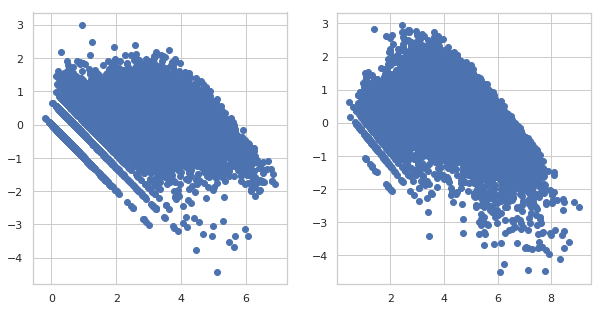

In [124]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.scatter(resc.fittedvalues, resc.resid)

plt.subplot(122)
plt.scatter(resr.fittedvalues, resr.resid)
plt.show()

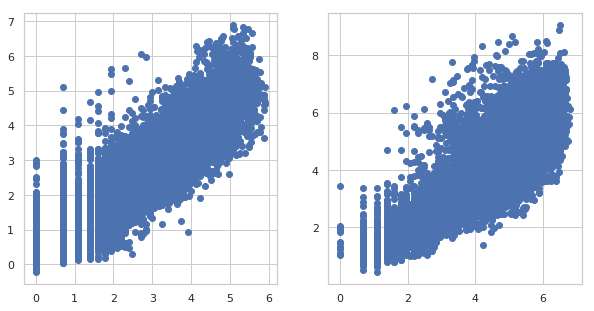

In [121]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.scatter(modc.endog, resc.fittedvalues)

plt.subplot(122)
plt.scatter(modr.endog, resr.fittedvalues)
plt.show()

# 데이터 탐색

# 1. target

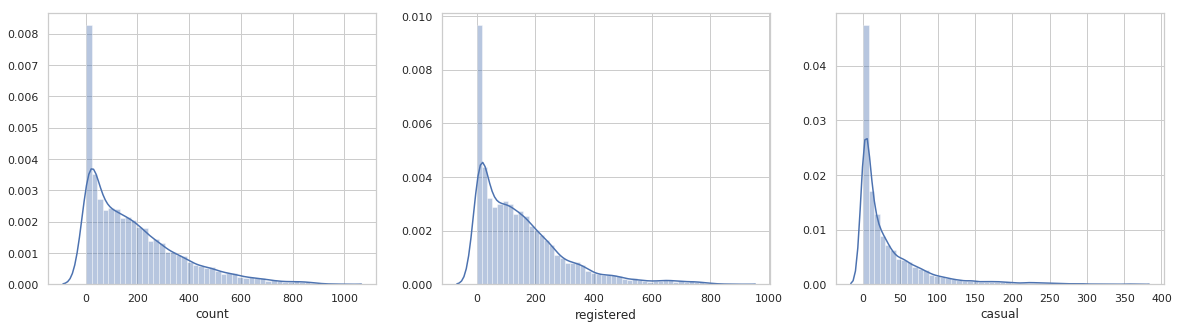

In [103]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(df['count'])
plt.subplot(132)
sns.distplot(df['registered'])
plt.subplot(133)
sns.distplot(df['casual'])
plt.show()

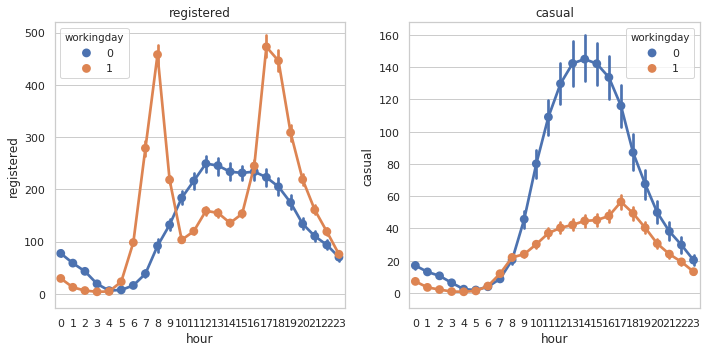

In [119]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(data=df, x='hour', y='registered', hue='workingday')
plt.title('registered')

plt.subplot(122)
sns.pointplot(data=df, x='hour', y='casual', hue='workingday')
plt.title('casual')

plt.tight_layout()
plt.show()

# 2. independent values

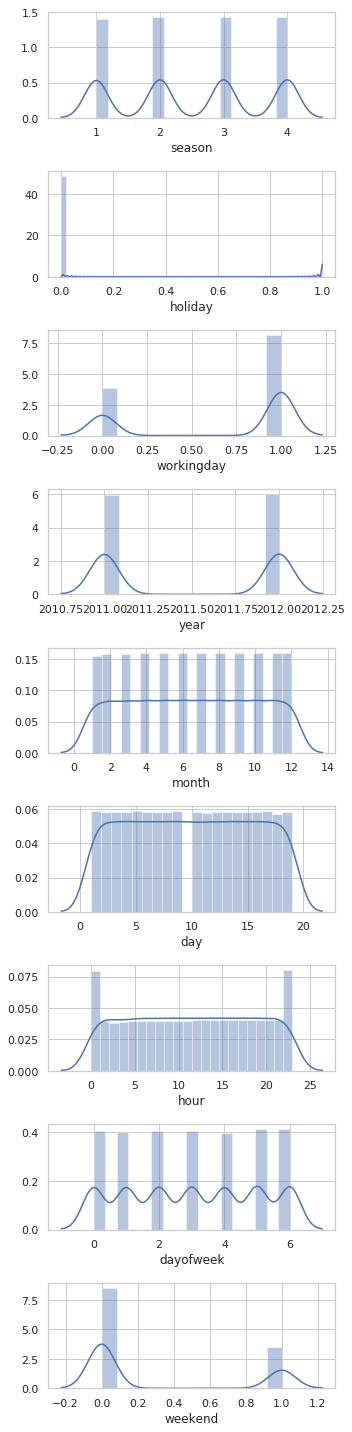

In [108]:
ls = [,'season', 'holiday', 'workingday', 'year', 'month', 'day', 'hour', 'dayofweek', 'weekend']

f, axes = plt.subplots(len(ls),1, figsize=(5,20))
idx = 0
for ax in axes:
    sns.distplot(df[ls[idx]], ax=ax)
    idx += 1
plt.tight_layout()
plt.show()

# Y vs X
- 선형성 보기 어려움
- 카테고리 필요

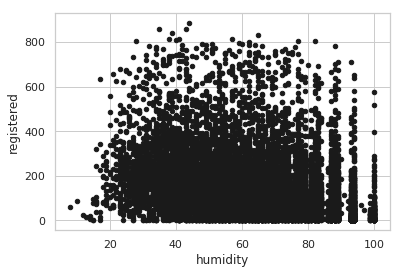

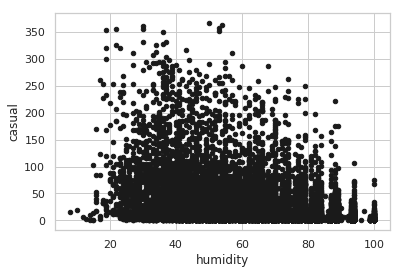

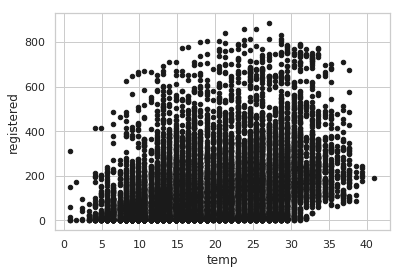

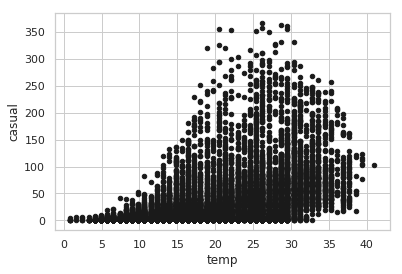

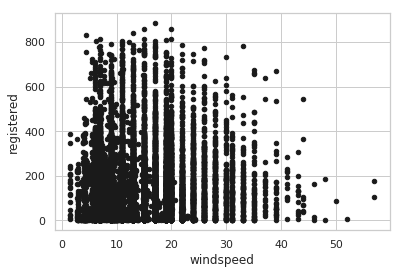

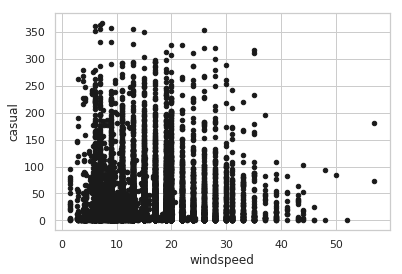

In [111]:
temp = ['humidity', 'temp', 'windspeed']

for i in range(len(temp)):
    df.plot(temp[i], 'registered', kind='scatter', c='k')
    df.plot(temp[i], 'casual', kind='scatter', c='k')
plt.show()

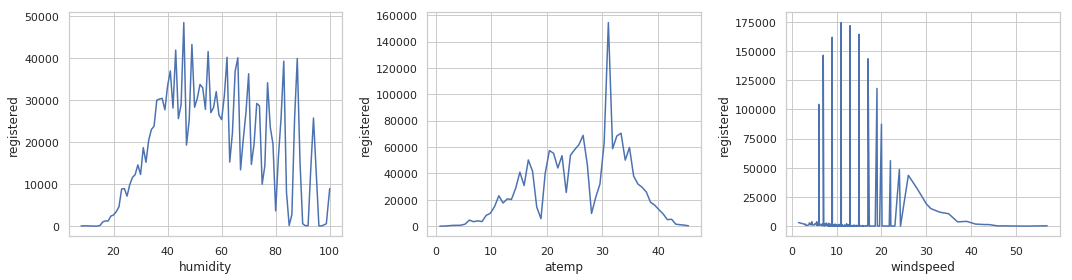

In [112]:
# registered
plt.figure(figsize=(15, 4))
plt.subplot(131)
sns.lineplot(x='humidity', y='registered', estimator='sum', data=df, ci=None)
plt.subplot(132)
sns.lineplot(x='atemp', y='registered', estimator='sum', data=df, ci=None)
plt.subplot(133)
sns.lineplot(x='windspeed', y='registered', estimator='sum', data=df, ci=None)
plt.tight_layout()
plt.show()

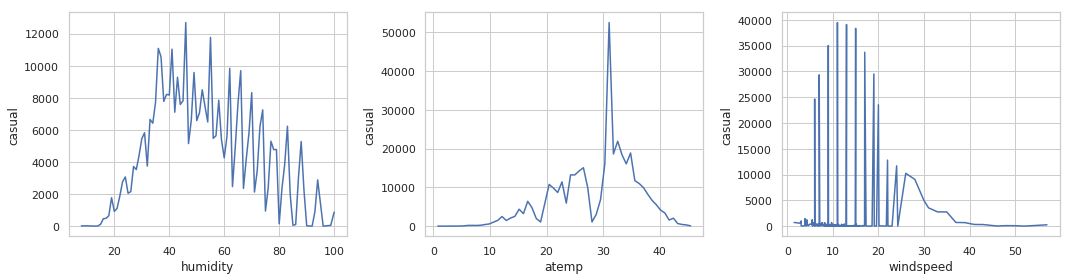

In [113]:
# casual
plt.figure(figsize=(15, 4))
plt.subplot(131)
sns.lineplot(x='humidity', y='casual', estimator='sum', data=df, ci=None)
plt.subplot(132)
sns.lineplot(x='atemp', y='casual', estimator='sum', data=df, ci=None)
plt.subplot(133)
sns.lineplot(x='windspeed', y='casual', estimator='sum', data=df, ci=None)
plt.tight_layout()
plt.show()

# 카테고리 탐색

In [115]:
temp = df.select_dtypes(include=['category']).columns
temp

Index(['season', 'holiday', 'workingday', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weekend'],
      dtype='object')

In [116]:
import itertools
ls =[]
comb = tuple(itertools.combinations(temp, 2))

for elem in comb:
    s = "C({}):C({})*windspeed".format(elem[0], elem[1])
    ls.append(s)

def cat_rsquare(y, cat_list, df):
    result_dict = {}
    for cat in cat_list:
        f = '{} ~ {} -1'.format(y, cat)
        r = sm.OLS.from_formula(f, data=df).fit().rsquared_adj
        result_dict[cat] = float("{:.3f}".format(r))
    return pd.DataFrame([result_dict]).T.sort_values(0, ascending=False).rename(columns={0:'{}(r square)'.format(y)})[:5]

$$
Y = w_0 + w_1 \cdot x + w_2 \cdot d + w_3 \cdot (xd) 
$$

In [117]:
# registered: windspeed
cat_rsquare('registered', ls, df)

,registered(r square)
C(workingday):C(hour)*windspeed,0.695
C(hour):C(dayofweek)*windspeed,0.690
C(hour):C(weekend)*windspeed,0.686
C(year):C(hour)*windspeed,0.639
C(month):C(hour)*windspeed,0.606


In [118]:
# casual: windspeed
cat_rsquare('casual', ls, df)

,casual(r square)
C(workingday):C(hour)*windspeed,0.540
C(hour):C(dayofweek)*windspeed,0.537
C(hour):C(weekend)*windspeed,0.531
C(month):C(hour)*windspeed,0.478
C(season):C(hour)*windspeed,0.447


---

In [ ]:
부족한 부분
- 릿지, 라소
- 상호작용항 취사 선택은

# RSMLE

$$
\sqrt{\dfrac{1}{n}}
$$

In [35]:
from sklearn.metrics import make_scorer

def rmsle(pred, actual):
    
    log_pred = np.log(np.array(pred +2))
    log_actual = np.log(np.array(actual + 2))
    
    difference = (log_pred - log_actual)**2
    print(difference)
    # 평균을 낸다
    mean_difference = difference.mean()
    print(mean_difference)
    # 루트
    score = np.sqrt(mean_difference)
    
    return score

## 1) Lasso

In [20]:
from patsy import dmatrix
from sklearn.model_selection import train_test_split
fc = "humidity/C(hour_dow) + temp/C(work_hour) + windspeed/C(work_hour) -1"
fr = "humidity/C(work_hour) + temp/C(work_hour) + windspeed/C(work_hour) -1"
dfX = dmatrix(fc, df)
dfy = np.log1p(df['casual'])

# data split
X_train, X_test, y_train, y_test = \
train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [ ]:
f1_sco

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

alphas = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter': [3000], 'alpha': alphas}
lasso_m = Lasso()
grid_l_m = GridSearchCV(lasso_m, lasso_params_, cv=5)

# 중요
grid_l_m.fit(X_train, y_train)
model = grid_l_m.best_estimator_

NameError: name 'X_test' is not defined

In [40]:
y_pred = model.predict(X_test)
y_test
rmsle(y_pred, y_test)

[3.54655336 3.56441048 3.25496556 ... 2.80423038 8.34488343        nan]
nan


nan

In [23]:
from sklearn.metrics import f1_score

In [ ]:
__f1 = f1_score(y_test, y=y_pred, average='micro')
_confusion = confusion_matrix(y_Test, y_pred)
__precision =precision_score(y_test, y_pred)
_recall = recall_score(y_test, y_pred)
__statistisc = {'f1_score: __f1,
               'confusion matrix': _confusion,
               'precision': __precision,
               'reacll': _recall}
return model, __statistics






In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# X_train, y_train
# Lasso는 1부터
lasso_m = Lasso()

# alphas = np.logspace(-4, 0, 200)
alphas = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter': [3000], 'alpha': alphas}
grid_lasso_m = GridSearchCV(lasso_m, lasso_params_, scoring=rmsle_scorer, cv=5)

y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)

preds = grid_lasso_m.predict(X_train)
print(grid_lasso_m.best_params_)
print("RMSLE Value for Lasso Regression: ", \
      rmsle(np.exp(y_train_log), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df['alpha'] = df['parameters'].apply(lambda x: x['alpha'])
df['rmsle'] = df['mean_validation_score'].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax=ax)

NameError: name 'rmsle_scorer' is not defined

## 2) ridge

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Lasso는 1부터
ridge_m = Ridge()

# alphas = np.logspace(-4, 0, 200)
alphas = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
ridge_params_ = {'max_iter': [3000], 'alpha': alphas}
grid_ridge_m = GridSearchCV( ridge_m, ridge_params_, scoring=rmsle_scorer, cv=5)

y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)

preds = grid_lasso_m.predict(X_train)
print(grid_ridge_m.best_params_)
print("RMSLE Value for Ridge Regression: ", \
      rmsle(np.exp(y_train_log), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df['alpha'] = df['parameters'].apply(lambda x: x['alpha'])
df['rmsle'] = df['mean_validation_score'].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax=ax)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01)

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_test)
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(y_train, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)

NameError: name 'y_train' is not defined

## plotting: category

In [35]:
len(axes)

2

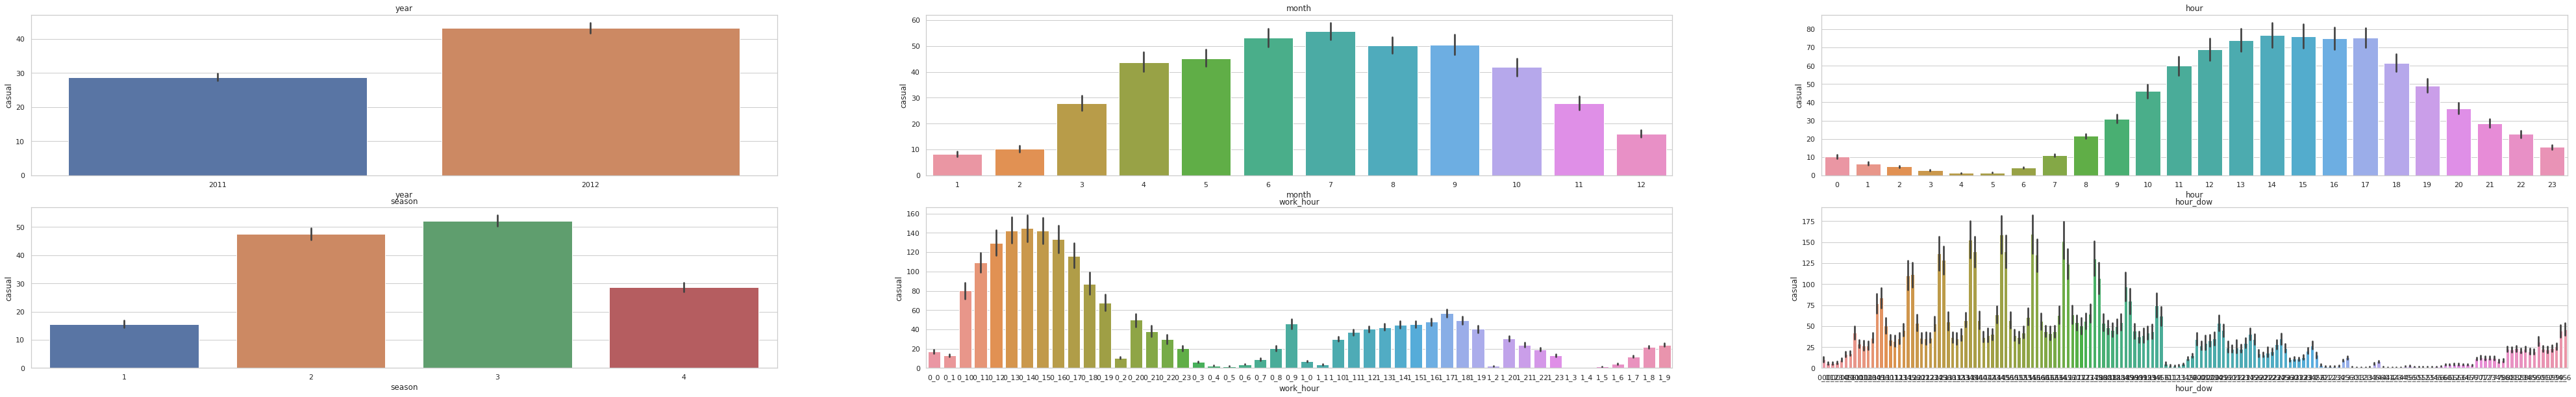

In [41]:
ls = ['year', 'month', 'hour', 'season', 'work_hour', 'hour_dow']
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(70,10))
i = 0

for row in range(2):
    for column in range(3):
        sns.barplot(data=df, x=ls[i], y='casual', ax=axes[row][column])
        axes[row][column].set(ylabel='casual', title=ls[i])
        i += 1
    

In [ ]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,5)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax1)
sns.barplot(data=train, x='day', y='count', ax=ax1)
sns.barplot(data=train, x='hour', y='count', ax=ax1)

ax1.set(ylabel='Count', title="yearly rent")
ax2.set(ylabel='month', title="monthly rent")
ax3.set(ylabel='day', title="daily rent")
ax4.set(ylabel='hour', title="hourly rent")

## plotting: boxplot

In [18]:
train = pd.read_csv('train.csv')

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='count', title='rent')
axes[0][1].set(xlabel='season', ylabel='count', title='seasonal rent')
axes[1][0].set(xlabel='hour of the day', ylabel='count', title='hourly rent')
axes[1][1].set(xlabel='working day', ylabel='count', title='workingday rent')

ValueError: Could not interpret input 'hour'

# corr matrix

In [ ]:
corrMatt = train[['temp', 'atemp', 'casual']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False